## Data Exploration on Airbnb housing

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

### Loading Data

In [3]:
airbnb = pd.read_csv(r'C:\Users\hp\Desktop\AB_NYC_2019.csv')

# First glimpse on data
airbnb.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [4]:
#checking the amount of rows
len(airbnb)

#checking data type of every column
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

**Takeaway**: The dataset provides a very rich amount of information for deep data exploration. We do already see some missing values, which will require cleaning and handling of NaN values.

### Understanding, Wrangling and Cleaning Data

In [5]:
# Searching for null values
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**Takeaway**:Looking into the nature of our dataset, we can state further things: columns `name` and `host_name` are irrelevant and insignificant to our data analysis. Columns `last_review` and `review_per_month` need very simple handling. To elaborate, `last_review` is date; if there were no reviews for the listing - data simply will not exist. In our case, this column is irrelevant, therefore appending those values is not needed. For `review_per_month` column we can simply append it with 0.0 for missing values; we can see that in `number_of_review` that column will have a 0, therefore following this logic with 0 total views there will be 0.0 rate of reviews per month.

In [6]:
# Drop columns that are not significant or unethical for the data exploration
airbnb.drop(['id', 'host_name', 'last_review'], axis=1, inplace=True)

airbnb.head(3)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365


**Note**: We are dropping `host_name` not only because it is insignificant but also for ethical reasons. There is no reason to continue data exploration and model training towards specific individuals based on their names.

In [7]:
# replacing NaN values in `reviews_per_month`
airbnb.fillna({'review_per_month': 0}, inplace=True)

In [8]:
# examining the unique values of neighbourhood
len(airbnb.neighbourhood.unique())

221

In [9]:
# examining the unique values of room_type
airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

### Exploring and Vizualizing Data

In [10]:
# what hosts (IDs) have the most listings on Airbnb platform
top_host = airbnb.host_id.value_counts().head(10)
top_host

# or we can use the second alternative
#top_host_check = airbnb.calculated_host_listings_count.max()
#top_host_check

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [11]:
# Set fig size for future vizualizations
sns.set(rc = {'figure.figsize': (10, 8)})
sns.set_style('white')

In [12]:
top_host_df = pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index': 'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df

,Host_ID,P_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


[Text(0, 0, '7503643'),
 Text(1, 0, '12243051'),
 Text(2, 0, '16098958'),
 Text(3, 0, '22541573'),
 Text(4, 0, '30283594'),
 Text(5, 0, '61391963'),
 Text(6, 0, '107434423'),
 Text(7, 0, '137358866'),
 Text(8, 0, '200380610'),
 Text(9, 0, '219517861')]

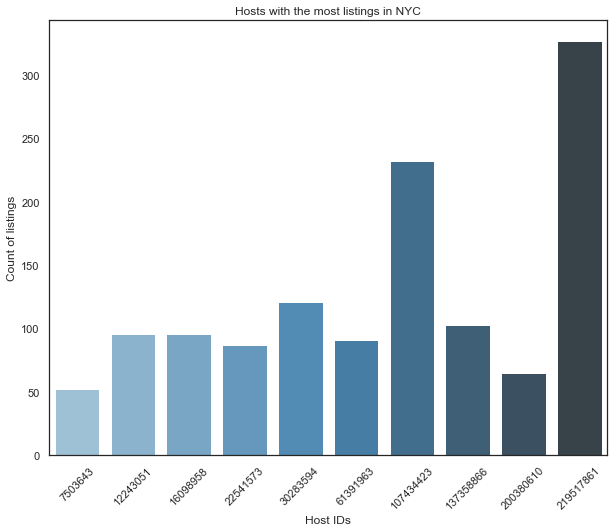

In [13]:
viz_1 = sns.barplot(x='Host_ID', y='P_Count', data=top_host_df, palette='Blues_d')
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

In [14]:
# Neighbourhoods presented 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island' and 'Bronx'

# Brooklyn
sub_1=airbnb.loc[airbnb['neighbourhood_group'] == 'Brooklyn']
price_sub1 = sub_1[['price']]
# Manhattan
sub_2 = airbnb.loc[airbnb['neighbourhood_group'] == 'Manhattan']
price_sub2 = sub_2[['price']]
# Queens
sub_3 = airbnb.loc[airbnb['neighbourhood_group'] == 'Queens']
price_sub3 = sub_3[['price']]
# Staten Island
sub_4 = airbnb.loc[airbnb['neighbourhood_group'] == 'Staten Island']
price_sub4 = sub_4[['price']]
# Bronx
sub_5 = airbnb.loc[airbnb['neighbourhood_group'] == 'Bronx']
price_sub5 = sub_5[['price']]

# put all the prices in the list
price_list_by_n = [price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [15]:
# Creating an empty list that will append with price distributions for each Neighbour group
p_l_b_n_2 = []

# Creating a list with known values in neighbour_group column
nei_list = ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

# Creating a for loop to get statistics for price ranges and append it to our empty lsit
for x in price_list_by_n:
    i = x.describe(percentiles=[.25, .50, .75])
    i = i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)

# Changing names of the price column to the area name for easier reading the table
p_l_b_n_2[0].rename(columns={'price': nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price': nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price': nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price': nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price': nei_list[4]}, inplace=True)

# Finalizing the dataframe for final view
stat_df = p_l_b_n_2
stat_df = [df.set_index('Stats') for df in stat_df]
stat_df = stat_df[0].join(stat_df[1:])
stat_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,0.0,10.0,13.0,0.0
25%,60.0,95.0,50.0,50.0,45.0
50%,90.0,150.0,75.0,75.0,65.0
75%,150.0,220.0,110.0,110.0,99.0
max,10000.0,10000.0,10000.0,5000.0,2500.0


Text(0.5, 1.0, 'Density and distribution of prices for each neighbour_group')

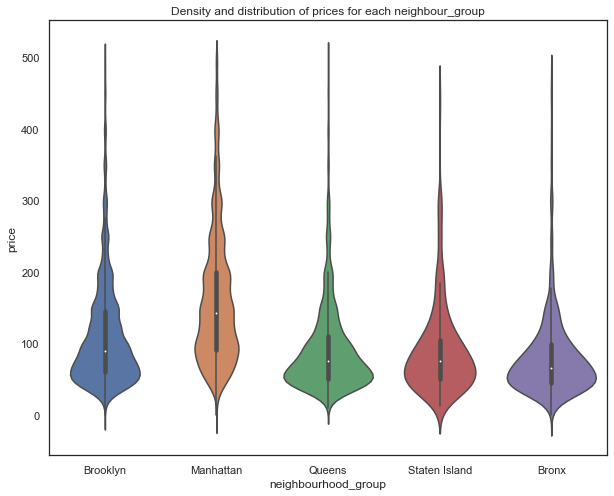

In [16]:
# Creating a sub-frame with no extreme values / less than 500
sub_6 = airbnb[airbnb.price < 500]

# using violinplot to showcase density and distribution of prices
viz_2 = sns.violinplot(data = sub_6, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighbour_group')

**Interpretation**: With the statistical table and the violin plot we can definitely observe a couple of things about distribution of prices for Airbnb in NYC. First, we can state that Manhattan has the highest range of prices for the listings with $150 price as average, followed by Brooklyn with \$90 per night. Queens and Staten Island appear to have very similar distributions, Bronx is the cheapest of them all. This distribution and density of prices were completely expected since Manhattan is one of the most expensive places in the world to live, whereas Bronx on the other hand appears to have lower standards of living.

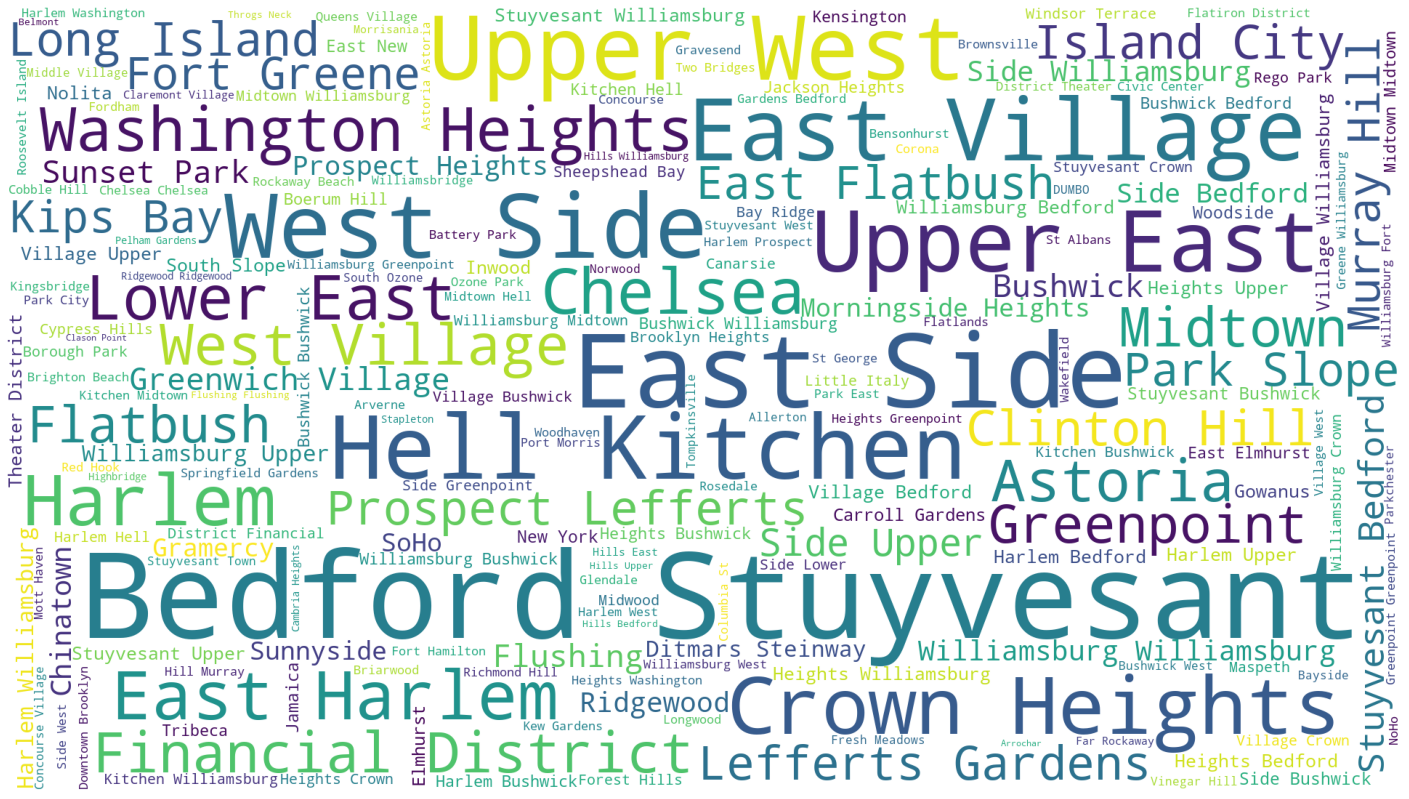

In [55]:
# Creating a word cloud to have a glimpse of the most mentioned Neighbourhoods

from wordcloud import WordCloud
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(airbnb.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

In [17]:
# Finding out top 10 neighbourhoods
airbnb.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

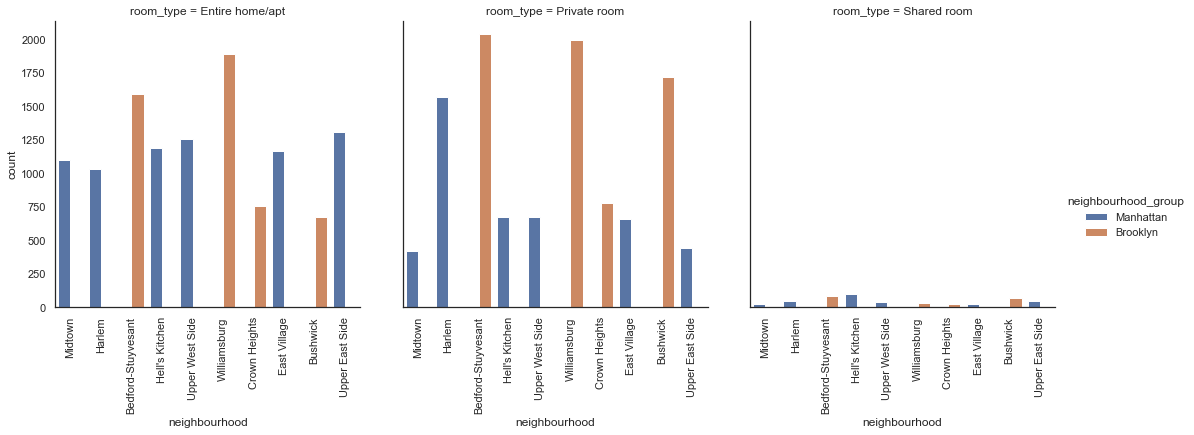

In [18]:
# Combine this with our boroughs and room type

#grabbing top 10 neighbourhoods for sub-dataframe
sub_7=airbnb.loc[airbnb['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)

**Interpretation**: First, we can see that our plot consists of 3 subplots that is the power of using catplot; with such output, we can easily proceed with comparing distributions among interesting attributes. The observation that is definitely contrasted the most is that `Shared room` type Airbnb listing is barely available among 10 most listening-populated neighborhoods. Then, we can see for these 10 neighbourhoods only 2 boroughs are represented: Manhattan and Brooklyn; that was somewhat expected as Manhattan and Brooklyn are one of the most traveled destinations, therefore would have the most availability. We can also observe that Bedford-Stuyvesant and Williamsburg are the most popular for Manhattan borough, and Harlem for Brooklyn.

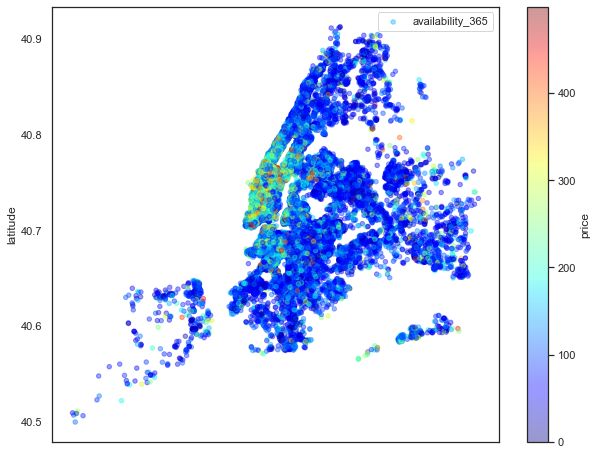

In [20]:
# using given longitude and latitude for the analysis

# Scatter plot
viz_4 = sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', cmap=plt.get_cmap('jet'), colorbar = True, alpha=0.4, figsize=(10, 8))

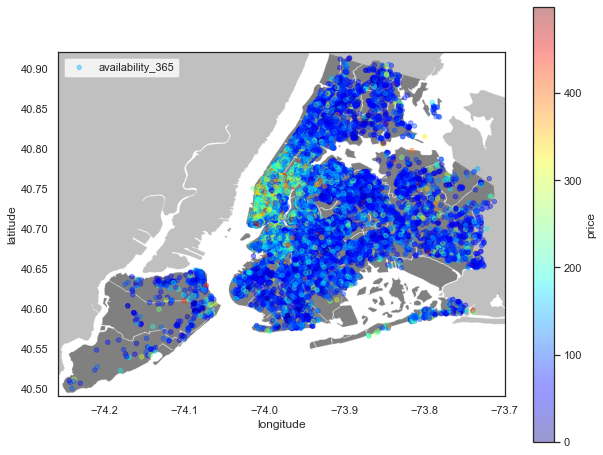

In [43]:
import urllib

#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
nyc_img=plt.imread(r'C:\Users\hp\Desktop\Neighbourhoods_New_York_City_Map.PNG')
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()

**Takeaway**: Using latitude and longitude we were able to visualize all NYC listings. Also, we added a color-coded range for each point on the map based on the price of the listing. 

In [44]:
# Initializing empty list where we are going to put name strings
_names_ = []

# getting name strings from the column and appending it to the list
for name in airbnb.name:
    _names_.append(name)
    
# setting a function that will split those name strings into separate words
def split_name(name):
    splt = str(name).split()
    return splt

# initializing empty list where we are going to have words counted
_names_for_count_ = []

# getting name string from our list and using split function, latter appending to list above
for x in _names_:
    for word in split_name(x):
        word=word.lower()
        _names_for_count_.append(word)

In [45]:
from collections import Counter

# Top 25 words used by host to name their listing
_top_25_w = Counter(_names_for_count_).most_common()
_top_25_w = _top_25_w[0:25]

In [46]:
# Create a dataframe using our findings for further vizualizations
sub_w = pd.DataFrame(_top_25_w)
sub_w.rename(columns={0: 'Words', 1:'Count'}, inplace=True)

[Text(0, 0, 'in'),
 Text(1, 0, 'room'),
 Text(2, 0, 'bedroom'),
 Text(3, 0, 'private'),
 Text(4, 0, 'apartment'),
 Text(5, 0, 'cozy'),
 Text(6, 0, 'the'),
 Text(7, 0, 'to'),
 Text(8, 0, 'studio'),
 Text(9, 0, 'brooklyn'),
 Text(10, 0, 'apt'),
 Text(11, 0, 'spacious'),
 Text(12, 0, '1'),
 Text(13, 0, 'with'),
 Text(14, 0, '2'),
 Text(15, 0, 'of'),
 Text(16, 0, 'east'),
 Text(17, 0, 'and'),
 Text(18, 0, 'manhattan'),
 Text(19, 0, '&'),
 Text(20, 0, 'park'),
 Text(21, 0, 'sunny'),
 Text(22, 0, 'beautiful'),
 Text(23, 0, 'near'),
 Text(24, 0, 'williamsburg')]

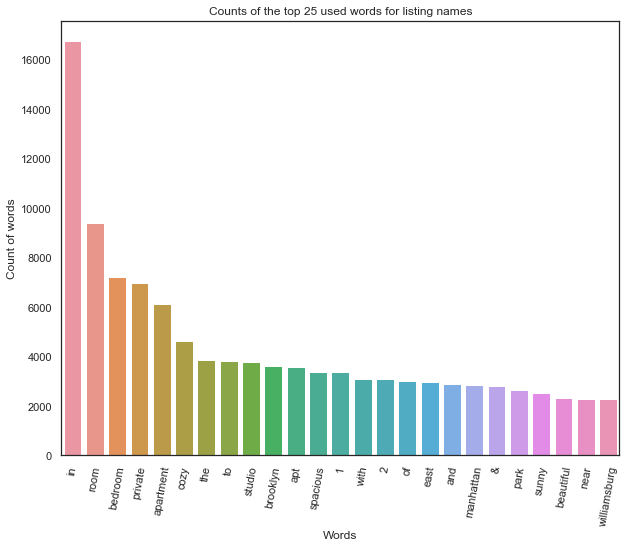

In [48]:
# Create Barplot
viz_5 = sns.barplot(x='Words', y='Count', data=sub_w)
viz_5.set_title('Counts of the top 25 used words for listing names')
viz_5.set_ylabel('Count of words')
viz_5.set_xlabel('Words')
viz_5.set_xticklabels(viz_5.get_xticklabels(), rotation=80)

**Takeaway**: We can observe that finding out and going over top 25 used listings' name words - we are able to see one clear trend. It shows that hosts are simply describing their listings in a short form with very specific terms for easier search by a potential customer. Such words are 'room', 'bedroom', 'private', 'apartment', 'studio'. This shows that there are no catchphrases or 'popular/trending' terms that are used for names; hosts use very simple terms describing the space and the area where the listing is.

In [49]:
# Number of reviews

#let's grab 10 most reviewed listings in NYC
top_reviewed_listings = airbnb.nlargest(10, 'number_of_reviews')
top_reviewed_listings

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


In [50]:
price_avrg = top_reviewed_listings.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 65.4


**Takeaway**: From the result, we can observe that top 10 most reviewed listings on Airbnb for NYC have average price of $65 with most of the listings under \$50, and 9/10 of them are `Private room` type;whereas top reviewed listing has 629 reviews.

### Regression Analysis

In [60]:
# Drop useless columns
#airbnb.drop(['host_id', 'latitude', 'longitude', 'neighbourhood', 'number_of_reviews', 'reviews_per_month'], axis=1, inplace=True)
airbnb.drop(['name'], axis=1, inplace=True)

In [61]:
airbnb.head(3)

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,6,365
1,Manhattan,Entire home/apt,225,1,2,355
2,Manhattan,Private room,150,3,1,365


In [66]:
# Encode the variables
df = pd.get_dummies(airbnb)
df.head(3)

,price,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,149,1,6,365,0,1,0,0,0,0,1,0
1,225,1,2,355,0,0,1,0,0,1,0,0
2,150,3,1,365,0,0,1,0,0,0,1,0


Index(['price', 'minimum_nights', 'calculated_host_listings_count',
       'availability_365', 'neighbourhood_group_Bronx',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')

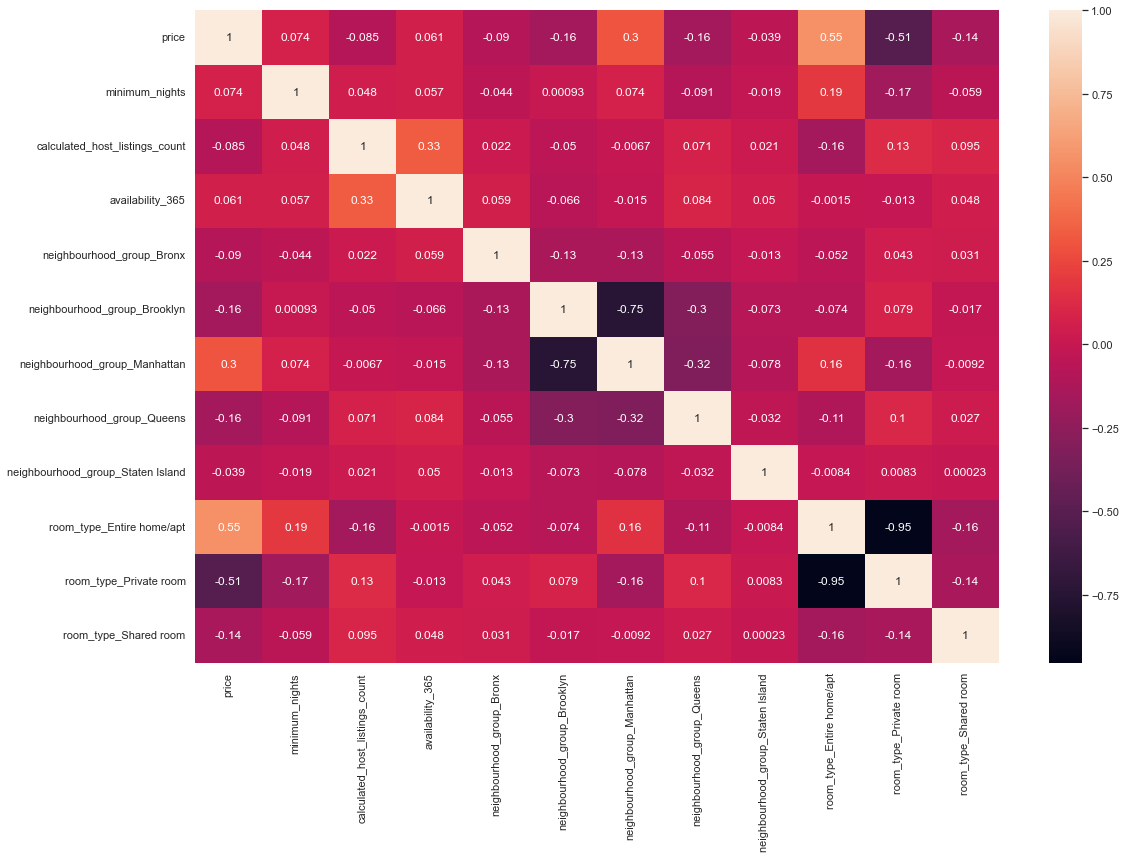

In [69]:
# Correlation Matrix
corr = df.corr(method='kendall')
plt.figure(figsize=(18, 12))
sns.heatmap(corr, annot=True)
df.columns

In [70]:
# importing Regression libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [80]:
X = df.drop(['price'], axis=1)
y = df['price']

# Get Train and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
# Linear Regression Model
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

r2_score(y_test, y_pred)

0.11331685454017726

In [87]:
# Preparing a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(min_samples_leaf=.0001, random_state=42)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

r2_score(y_test, y_pred)

0.08036427210799602

In [92]:
# Preparing Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(min_samples_leaf=.0001, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

r2_score(y_test, y_pred)

0.1289575398577567